### Purpose 

double check values for power and event rate by spot checking calculations in excel

In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne import io
from mne.datasets import sample
from mne.minimum_norm import compute_source_psd, read_inverse_operator

#create a dataframe where each ROW corresponds to a different SUBJECT
# populate columns age / sex /  band : baseline power : baseline event 

filepath = '/scratch/jsheikh2/ted_temp/ds005505/participants.tsv'
import csv

import pandas as pd

participants_df = pd.read_csv(filepath, sep='\t')

#display(participants_df)


#remove irrelevant columns - keep the availability columns for reference
participants_df = participants_df[['participant_id', 'sex', 'age', 'RestingState', 'seqLearning6target', 'seqLearning8target']]
display(participants_df)

,participant_id,sex,age,RestingState,seqLearning6target,seqLearning8target
0,sub-NDARAC904DMU,F,11.3386,available,unavailable,available
1,sub-NDARAG143ARJ,M,7.6648,available,available,unavailable
2,sub-NDARAM704GKZ,M,10.9449,available,unavailable,unavailable
3,sub-NDARAN385MDH,M,10.7089,available,unavailable,available
4,sub-NDARAP359UM6,F,12.8422,available,unavailable,available
...,...,...,...,...,...,...
131,sub-NDARZJ016GL0,F,10.6547,available,unavailable,available
132,sub-NDARZN277NR6,F,14.8787,available,unavailable,available
133,sub-NDARZP630WYL,M,18.6547,available,unavailable,unavailable
134,sub-NDARZV608BL8,F,14.4188,available,unavailable,available


participant_id        sub-NDARAC904DMU
sex                                  F
age                            11.3386
RestingState                 available
seqLearning6target         unavailable
seqLearning8target           available
Name: 0, dtype: object
Reading /scratch/jsheikh2/ted_temp/ds005505/sub-NDARAC904DMU/eeg/sub-NDARAC904DMU_task-seqLearning8target_eeg.set


/tmp/ipykernel_4063587/2675930357.py:18: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path)


Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_4063587/2675930357.py:21: UserWarning: Zero value in spectrum for channel Cz
  psd = raw.compute_psd()
/tmp/ipykernel_4063587/2675930357.py:22: UserWarning: Infinite value in PSD for channel Cz.
These channels might be dead.
  psd.plot(average=True, picks="data", amplitude=False)


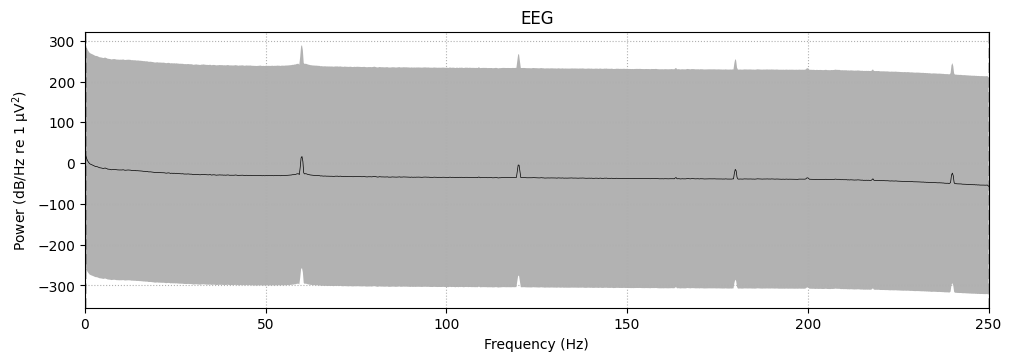

In [2]:
# Usage examples:
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 12),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Slow gamma': (25, 55),
    'Fast gamma': (60, 100),
    'SWR (human)': (80, 150)
}

#display(participants_df)

for idx, row in participants_df.iterrows():
    print(row)
    path = f'/scratch/jsheikh2/ted_temp/ds005505/{row["participant_id"]}/eeg/{row["participant_id"]}_task-seqLearning8target_eeg.set'
    #https://mne.tools/stable/generated/mne.io.read_raw_eeglab.html
    raw = mne.io.read_raw_eeglab(path)

    #https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html
    psd = raw.compute_psd()
    psd.plot(average=True, picks="data", amplitude=False)

    break 

### Remove bad channels (Cz in this case)

participant_id        sub-NDARAC904DMU
sex                                  F
age                            11.3386
RestingState                 available
seqLearning6target         unavailable
seqLearning8target           available
Name: 0, dtype: object
Reading /scratch/jsheikh2/ted_temp/ds005505/sub-NDARAC904DMU/eeg/sub-NDARAC904DMU_task-RestingState_eeg.set


Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


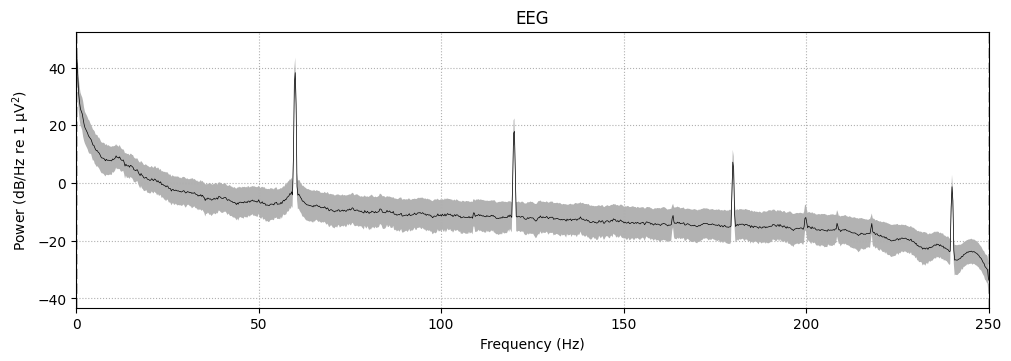

In [2]:
# Usage examples:
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 12),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Slow gamma': (25, 55),
    'Fast gamma': (60, 100),
    'SWR (human)': (80, 150)
}

#display(participants_df)

for idx, row in participants_df.iterrows():
    print(row)
    path = f'/scratch/jsheikh2/ted_temp/ds005505/{row["participant_id"]}/eeg/{row["participant_id"]}_task-RestingState_eeg.set'
    #https://mne.tools/stable/generated/mne.io.read_raw_eeglab.html
    rawNew = mne.io.read_raw_eeglab(path)

    #https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html
    
    #add Cz to bads
    rawNew.info['bads'].append('Cz') 
    psdNew = rawNew.compute_psd()
    psdNew.plot(average=True, picks="data",exclude="bads", amplitude=False)

    break 

In [5]:
#sampling frequency?
filepath = '/scratch/jsheikh2/ted_temp/ds005505/sub-NDARAC904DMU/eeg/sub-NDARAC904DMU_task-RestingState_eeg.json'
import json

import pandas as pd

with open(filepath, 'r') as f:
    json_file = json.load(f)

print(json_file)

{'PowerLineFrequency': 60, 'TaskName': 'RestingState', 'EEGChannelCount': 129, 'EEGReference': 'Cz', 'RecordingType': 'continuous', 'RecordingDuration': 403.474, 'SamplingFrequency': 500, 'SoftwareFilters': 'n/a'}


Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


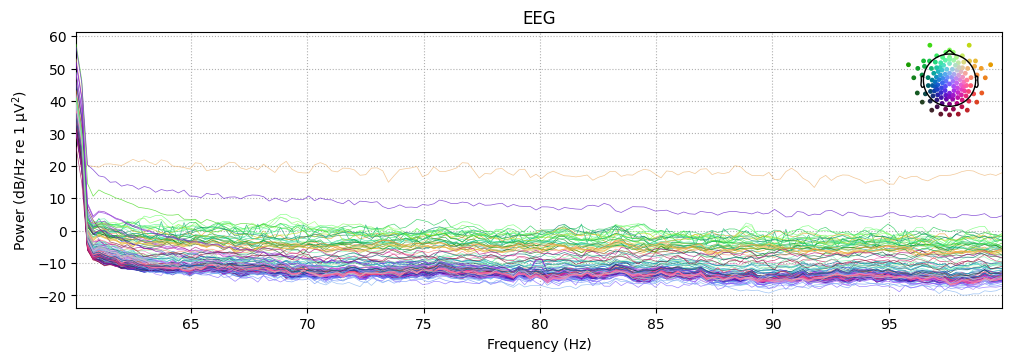

In [6]:
rawNew.info['bads'].append('Cz') 
psd3 = rawNew.compute_psd(fmin=60, fmax=100, exclude='bads', picks=['eeg'])
psd3.plot()

In [8]:
#given power OVER hertz, extract mean power in range
nparr = psd3.get_data()
nparr.mean()
#units are db/hz OR 1 micro volt^2

#This does match the excel file - first participants baseline power

1.3685639797559518e-10

In [ ]:
#are epochs relevant?
#according to the eeg.json, recording was continuous so they shouldnt be.
# are all recordings continuous?
#yes 

### Check event rate calculation